# Import Libraries

In [1]:
import numpy as np
import pandas as pd


# Import Data

In [2]:
# Import data.
loan_data_preprocessed_backup = pd.read_csv('loan_data_2007_2014_preprocessed.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (20,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Good/ Bad Definition
loan_data_preprocessed_backup['good_bad'] = np.where(loan_data_preprocessed_backup['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)
# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met.

# Explore Data

In [4]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()

In [5]:
loan_data_preprocessed.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [6]:
loan_data_preprocessed.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... addr_state:UT addr_state:VA  \
0   36 months     10.65       162.87     B  ...             0             0   
1   60 months     15.27        59.83     C  ...             0             0   
2   36 months     15.96        84.33     C  ...             0             0   
3   36 months     13.49       339.31     C  ...             0             0   
4   60 months     12.69        67.79     B  ...             0             0   

  addr_state:VT addr_state:WA  addr_state:WI addr_state:WV addr_state:WY  \
0             0             0              0             0             0   
1             0             0              0             0             0   
2             0             0              0             0             0   
3             0             0              0             0             0   
4             0             0              0             0             0   

  initial_list_status:f initial_list_status:w good_bad  
0                     1                     0        1  
1                     1                     0        0  
2                     1                     0        1  
3                     1                     0        1  
4                     1                     0        1  

[5 rows x 208 columns]

In [7]:
loan_data_preprocessed.tail()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
466280          18400.0   60 months     14.47       432.64     C  ...   
466281          22000.0   60 months     19.97       582.50     D  ...   
466282          20700.0   60 months     16.99       514.34     D  ...   
466283           2000.0   36 months      7.90        62.59     A  ...   
466284           9975.0   36 months     19.20       367.58     D  ...   

       addr_state:UT addr_state:VA addr_state:VT addr_state:WA  addr_state:WI  \
466280             0             0             0             0              0   
466281             0             0             0             0              0   
466282             0             0             0             0              0   
466283             0             0             0             0              0   
466284             0             0             0             0              0   

       addr_state:WV addr_state:WY initial_list_status:f  \
466280             0             0                     0   
466281             0             0                     1   
466282             0             0                     1   
466283             0             0                     0   
466284             0             0                     1   

       initial_list_status:w good_bad  
466280                     1        1  
466281                     0        0  
466282                     0        1  
466283                     1        1  
466284                     0        1  

[5 rows x 208 columns]

In [8]:
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]
# Here we take only the accounts that were charged-off (written-off).

In [9]:
loan_data_defaults.shape

(43236, 208)

In [10]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [11]:
loan_data_defaults.isnull().sum()

Unnamed: 0                                                             0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
emp_length                                                          2337
home_ownership                                     

# Independent Variables

In [12]:
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)
# We fill the missing values with zeroes.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [13]:
#loan_data_defaults['mths_since_last_delinq'].fillna(loan_data_defaults['mths_since_last_delinq'].max() + 12, inplace=True)

In [14]:
loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)
# We fill the missing values with zeroes.

# Dependent Variables

In [15]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']
# We calculate the dependent variable for the LGD model: recovery rate.
# It is the ratio of recoveries and funded amount.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
loan_data_defaults['recovery_rate'].describe()
# Shows some descriptive statisics for the values of a column.

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

In [17]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])
# We set recovery rates that are greater than 1 to 1 and recovery rates that are less than 0 to 0.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
loan_data_defaults['recovery_rate'].describe()
# Shows some descriptive statisics for the values of a column.

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: recovery_rate, dtype: float64

In [19]:
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']
# We calculate the dependent variable for the EAD model: credit conversion factor.
# It is the ratio of the difference of the amount used at the moment of default to the total funded amount.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
loan_data_defaults['CCF'].describe()
# Shows some descriptive statisics for the values of a column.

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

In [21]:
loan_data_defaults.to_csv('loan_data_defaults.csv')
# We save the data to a CSV file.

# Explore Dependent Variables

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([2.0651e+04, 3.7200e+02, 6.4200e+02, 1.1950e+03, 1.9300e+03,
        1.9430e+03, 6.4500e+02, 7.4900e+02, 8.9700e+02, 1.2360e+03,
        1.5530e+03, 1.7910e+03, 2.3140e+03, 2.4510e+03, 1.0410e+03,
        6.7200e+02, 7.0600e+02, 4.7300e+02, 1.9600e+02, 2.1000e+02,
        1.8600e+02, 1.5500e+02, 1.5900e+02, 1.1500e+02, 5.6000e+01,
        6.1000e+01, 4.2000e+01, 5.1000e+01, 4.6000e+01, 3.5000e+01,
        4.0000e+01, 3.3000e+01, 2.9000e+01, 2.5000e+01, 3.2000e+01,
        4.0000e+01, 2.7000e+01, 3.0000e+01, 1.6000e+01, 1.4000e+01,
        2.7000e+01, 2.0000e+01, 1.7000e+01, 1.0000e+01, 6.0000e+00,
        1.1000e+01, 5.0000e+00, 1.0000e+01, 1.1000e+01, 9.0000e+00,
        1.2000e+01, 1.1000e+01, 9.0000e+00, 8.0000e+00, 3.0000e+00,
        4.0000e+00, 3.0000e+00, 8.0000e+00, 2.0000e+00, 5.0000e+00,
        3.0000e+00, 5.0000e+00, 5.0000e+00, 2.0000e+00, 4.0000e+00,
        3.0000e+00, 6.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00,
        6.0000e+00, 4.0000e+00, 4.0000e+00, 2.00

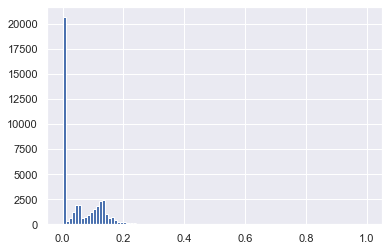

In [23]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 100)
# We plot a histogram of a variable with 100 bins.

(array([2.1023e+04, 1.8370e+03, 3.8730e+03, 1.3940e+03, 2.1330e+03,
        3.3440e+03, 4.7650e+03, 1.7130e+03, 1.1790e+03, 4.0600e+02,
        3.4100e+02, 2.7400e+02, 1.1700e+02, 9.3000e+01, 8.1000e+01,
        7.3000e+01, 5.4000e+01, 7.2000e+01, 5.7000e+01, 3.0000e+01,
        4.7000e+01, 2.7000e+01, 1.7000e+01, 1.5000e+01, 2.0000e+01,
        2.3000e+01, 1.7000e+01, 7.0000e+00, 1.1000e+01, 7.0000e+00,
        8.0000e+00, 7.0000e+00, 7.0000e+00, 8.0000e+00, 7.0000e+00,
        1.0000e+01, 6.0000e+00, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00, 9.0000e+00,
        9.0000e+00, 1.5000e+01, 8.0000e+00, 9.0000e+00, 3.3000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

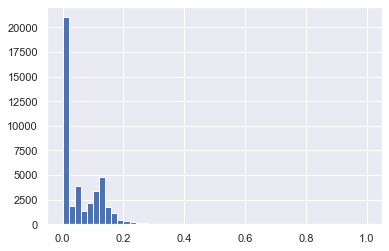

In [24]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)
# We plot a histogram of a variable with 50 bins.

(array([   3.,   17.,   16.,   44.,   16.,   13.,   71.,   26.,    7.,
          63.,   67.,   17.,   60.,   90.,   23.,   55.,   82.,   42.,
          47.,  123.,   82.,   70.,  122.,   86.,   89.,  110.,  117.,
         111.,  122.,  120.,  135.,  141.,  154.,  146.,  160.,  175.,
         152.,  187.,  202.,  174.,  204.,  208.,  210.,  211.,  241.,
         264.,  281.,  224.,  308.,  267.,  287.,  296.,  340.,  274.,
         365.,  370.,  392.,  364.,  393.,  419.,  411.,  429.,  445.,
         497.,  481.,  478.,  569.,  568.,  599.,  618.,  727.,  691.,
         626.,  805.,  804.,  776.,  881.,  851.,  916.,  934.,  925.,
        1078.,  933., 1218., 1041., 1082., 1336., 1040., 1374., 1073.,
        1406., 1287.,  952., 1414.,  795., 1320.,  578.,  949.,  343.,
         531.]),
 array([4.3800000e-04, 1.0433620e-02, 2.0429240e-02, 3.0424860e-02,
        4.0420480e-02, 5.0416100e-02, 6.0411720e-02, 7.0407340e-02,
        8.0402960e-02, 9.0398580e-02, 1.0039420e-01, 1.1038982e-01

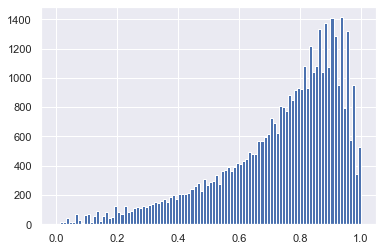

In [25]:
plt.hist(loan_data_defaults['CCF'], bins = 100)
# We plot a histogram of a variable with 100 bins.

In [26]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)
# We create a new variable which is 0 if recovery rate is 0 and 1 otherwise.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
loan_data_defaults['recovery_rate_0_1']

1         1
8         1
9         1
12        1
14        1
21        0
24        1
26        0
27        1
46        1
50        1
53        1
55        0
64        1
66        1
68        1
71        1
97        1
100       1
105       1
114       1
120       1
121       1
124       1
131       0
137       1
145       1
151       1
153       0
155       0
168       1
175       1
176       1
177       1
179       0
182       1
183       1
188       1
195       1
203       1
204       0
212       1
220       0
224       1
225       1
226       1
231       1
251       1
255       1
266       1
270       1
273       1
278       0
299       1
300       1
301       1
304       1
313       0
314       1
317       1
324       0
328       1
339       1
340       1
344       0
348       1
356       0
362       1
365       1
376       1
380       1
381       1
388       1
412       1
414       0
422       1
424       1
430       1
433       1
435       1
458       1
462       1
464       1
466 

# LGD Model

### Splitting Data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# LGD model stage 1 datasets: recovery rate 0 or greater than 0.
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

### Preparing the Inputs

In [30]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']
# List of all independent variables for the models.

In [31]:
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']
# List of the dummy variable reference categories. 

In [32]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]
# Here we keep only the variables we need for the model.

In [33]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [34]:
lgd_inputs_stage_1_train.isnull().sum()
# Check for missing values. We check whether the value of each row for each column is missing or not,
# then sum accross columns.

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:MORTGAGE                0
home_ownership:NONE                    0
home_ownership:OTHER                   0
home_ownership:OWN                     0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:car                            0
purpose:debt_consolidation             0
purpose:educational                    0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving                         0
purpose:other                          0
purpose:renewable_energy               0
purpose:small_business                 0
purpose:vacation                       0
purpose:wedding 

### Estimating the Model

In [35]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [36]:
reg_lgd_st_1 = LogisticRegression_with_p_values()
# We create an instance of an object from the 'LogisticRegression' class.
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
feature_name = lgd_inputs_stage_1_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [38]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_lgd_st_1.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

Feature name  Coefficients       p_values
0                             Intercept -4.779074e-03            NaN
1                               grade:A -1.414001e-03   9.867911e-01
2                               grade:B -4.865017e-03   9.440693e-01
3                               grade:C -5.522163e-03   9.342526e-01
4                               grade:D  1.341869e-03   9.846454e-01
5                               grade:E  1.412638e-03   9.853447e-01
6                               grade:F  3.581720e-03   9.677002e-01
7               home_ownership:MORTGAGE -3.391939e-04   9.894128e-01
8                   home_ownership:NONE  3.329424e-05   9.999671e-01
9                  home_ownership:OTHER -7.080178e-05   9.998676e-01
10                   home_ownership:OWN -1.364450e-04   9.973796e-01
11     verification_status:Not Verified -7.260927e-03   8.103489e-01
12  verification_status:Source Verified -4.625836e-03   8.659234e-01
13                          purpose:car  2.669539e-04   9.981796e-01
14           purpose:debt_consolidation -3.837433e-03   8.997975e-01
15                  purpose:educational -1.968211e-04   9.995077e-01
16             purpose:home_improvement  1.164891e-04   9.983855e-01
17                        purpose:house  3.522760e-04   9.980621e-01
18               purpose:major_purchase  4.167801e-04   9.961800e-01
19                      purpose:medical -8.160183e-05   9.993914e-01
20                       purpose:moving  7.233248e-06   9.999524e-01
21                        purpose:other  7.692839e-04   9.884806e-01
22             purpose:renewable_energy  1.063467e-04   9.997512e-01
23               purpose:small_business  9.762172e-04   9.893117e-01
24                     purpose:vacation  1.169884e-04   9.993578e-01
25                      purpose:wedding  2.001759e-04   9.989303e-01
26                initial_list_status:w -2.735940e-02   3.119071e-01
27                             term_int -2.786276e-02   1.683519e-28
28                       emp_length_int -2.154989e-03   4.853540e-01
29                   mths_since_issue_d  2.686488e-02  6.220122e-189
30          mths_since_earliest_cr_line -1.353728e-03   2.466207e-20
31                          funded_amnt  1.078814e-04   9.130671e-27
32                             int_rate  4.334838e-02   1.520256e-13
33                          installment -2.979805e-03   1.678195e-21
34                           annual_inc  2.542875e-07   4.672863e-01
35                                  dti -1.691720e-02   8.018647e-25
36                          delinq_2yrs  2.331951e-03   8.744672e-01
37                       inq_last_6mths  1.242180e-03   8.975791e-01
38               mths_since_last_delinq -2.198566e-04   6.674860e-01
39               mths_since_last_record -3.571551e-03   9.905830e-09
40                             open_acc -7.245086e-03   2.815879e-02
41                              pub_rec -1.179805e-04   9.976310e-01
42                            total_acc -5.864468e-03   6.204671e-05
43                       acc_now_delinq  2.836675e-04   9.987117e-01
44                     total_rev_hi_lim -1.030974e-06   1.176791e-01

In [39]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_1.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

Feature name  Coefficients       p_values
0                             Intercept -4.779074e-03            NaN
1                               grade:A -1.414001e-03   9.867911e-01
2                               grade:B -4.865017e-03   9.440693e-01
3                               grade:C -5.522163e-03   9.342526e-01
4                               grade:D  1.341869e-03   9.846454e-01
5                               grade:E  1.412638e-03   9.853447e-01
6                               grade:F  3.581720e-03   9.677002e-01
7               home_ownership:MORTGAGE -3.391939e-04   9.894128e-01
8                   home_ownership:NONE  3.329424e-05   9.999671e-01
9                  home_ownership:OTHER -7.080178e-05   9.998676e-01
10                   home_ownership:OWN -1.364450e-04   9.973796e-01
11     verification_status:Not Verified -7.260927e-03   8.103489e-01
12  verification_status:Source Verified -4.625836e-03   8.659234e-01
13                          purpose:car  2.669539e-04   9.981796e-01
14           purpose:debt_consolidation -3.837433e-03   8.997975e-01
15                  purpose:educational -1.968211e-04   9.995077e-01
16             purpose:home_improvement  1.164891e-04   9.983855e-01
17                        purpose:house  3.522760e-04   9.980621e-01
18               purpose:major_purchase  4.167801e-04   9.961800e-01
19                      purpose:medical -8.160183e-05   9.993914e-01
20                       purpose:moving  7.233248e-06   9.999524e-01
21                        purpose:other  7.692839e-04   9.884806e-01
22             purpose:renewable_energy  1.063467e-04   9.997512e-01
23               purpose:small_business  9.762172e-04   9.893117e-01
24                     purpose:vacation  1.169884e-04   9.993578e-01
25                      purpose:wedding  2.001759e-04   9.989303e-01
26                initial_list_status:w -2.735940e-02   3.119071e-01
27                             term_int -2.786276e-02   1.683519e-28
28                       emp_length_int -2.154989e-03   4.853540e-01
29                   mths_since_issue_d  2.686488e-02  6.220122e-189
30          mths_since_earliest_cr_line -1.353728e-03   2.466207e-20
31                          funded_amnt  1.078814e-04   9.130671e-27
32                             int_rate  4.334838e-02   1.520256e-13
33                          installment -2.979805e-03   1.678195e-21
34                           annual_inc  2.542875e-07   4.672863e-01
35                                  dti -1.691720e-02   8.018647e-25
36                          delinq_2yrs  2.331951e-03   8.744672e-01
37                       inq_last_6mths  1.242180e-03   8.975791e-01
38               mths_since_last_delinq -2.198566e-04   6.674860e-01
39               mths_since_last_record -3.571551e-03   9.905830e-09
40                             open_acc -7.245086e-03   2.815879e-02
41                              pub_rec -1.179805e-04   9.976310e-01
42                            total_acc -5.864468e-03   6.204671e-05
43                       acc_now_delinq  2.836675e-04   9.987117e-01
44                     total_rev_hi_lim -1.030974e-06   1.176791e-01

### Testing the Model

In [40]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]
# Here we keep only the variables we need for the model.

In [41]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [42]:
y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [43]:
y_hat_test_lgd_stage_1

array([1, 1, 0, ..., 1, 1, 0])

In [44]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [45]:
y_hat_test_proba_lgd_stage_1
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.

array([[0.38899453, 0.61100547],
       [0.43681471, 0.56318529],
       [0.57164876, 0.42835124],
       ...,
       [0.49911624, 0.50088376],
       [0.38410941, 0.61589059],
       [0.57543427, 0.42456573]])

In [46]:
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.

In [47]:
y_hat_test_proba_lgd_stage_1

array([0.61100547, 0.56318529, 0.42835124, ..., 0.50088376, 0.61589059,
       0.42456573])

In [48]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test

In [49]:
lgd_targets_stage_1_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

In [50]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)], axis = 1)
# Concatenates two dataframes.

In [51]:
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_test_proba_lgd_stage_1']

In [52]:
df_actual_predicted_probs.index = lgd_inputs_stage_1_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [53]:
df_actual_predicted_probs.head()

lgd_targets_stage_1_test  y_hat_test_proba_lgd_stage_1
178928                         1                      0.611005
69814                          1                      0.563185
101396                         0                      0.428351
463268                         1                      0.498321
253729                         0                      0.423977

### Estimating the Аccuracy of the Мodel

In [54]:
tr = 0.5
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

In [55]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted     0     1
Actual               
0          1552  2210
1           978  3908

In [56]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted         0         1
Actual                       
0          0.179463  0.255550
1          0.113090  0.451896

In [57]:
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.6313598519888992

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

In [59]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.
# we store each of the three arrays in a separate variable.

Text(0.5, 1.0, 'ROC curve')

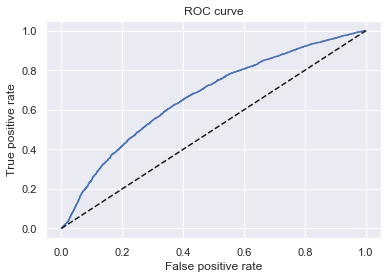

In [60]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [61]:
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.6674801094948886

### Saving the Model

In [62]:
import pickle

In [63]:
pickle.dump(reg_lgd_st_1, open('lgd_model_stage_1.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'lgd_model_stage_1.sav'.

### Stage 2 – Linear Regression

In [64]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]
# Here we take only rows where the original recovery rate variable is greater than one,
# i.e. where the indicator variable we created is equal to 1.

In [65]:
# LGD model stage 2 datasets: how much more than 0 is the recovery rate
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 42)
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

In [66]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
# Since the p-values are obtained through certain statistics, we need the 'stat' module from scipy.stats
import scipy.stats as stat

# Since we are using an object oriented language such as Python, we can simply define our own 
# LinearRegression class (the same one from sklearn)
# By typing the code below we will ovewrite a part of the class with one that includes p-values
# Here's the full source code of the ORIGINAL class: https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/base.py#L362


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    # nothing changes in __init__
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs

    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        # Calculate SSE (sum of squared errors)
        # and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [68]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [69]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]
# Here we keep only the variables we need for the model.

In [70]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [71]:
reg_lgd_st_2 = LinearRegression()
# We create an instance of an object from the 'LogisticRegression' class.
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
feature_name = lgd_inputs_stage_2_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [73]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_lgd_st_2.p
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values.round(3)
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

Feature name  Coefficients  p_values
0                             Intercept  2.406858e-01       NaN
1                               grade:A -6.826892e-02     0.000
2                               grade:B -5.083556e-02     0.000
3                               grade:C -3.748066e-02     0.000
4                               grade:D -2.717310e-02     0.000
5                               grade:E -1.315941e-02     0.002
6                               grade:F -5.260168e-03     0.275
7               home_ownership:MORTGAGE  2.832212e-03     0.061
8                   home_ownership:NONE  1.459035e-01     0.000
9                  home_ownership:OTHER -9.475922e-03     0.644
10                   home_ownership:OWN  5.000678e-03     0.040
11     verification_status:Not Verified  1.056585e-03     0.553
12  verification_status:Source Verified -1.009915e-03     0.535
13                          purpose:car -2.995960e-03     0.634
14           purpose:debt_consolidation  8.206319e-05     0.965
15                  purpose:educational  7.625467e-02     0.000
16             purpose:home_improvement -3.702374e-03     0.273
17                        purpose:house -3.786803e-03     0.620
18               purpose:major_purchase  2.914439e-03     0.538
19                      purpose:medical  1.078825e-02     0.074
20                       purpose:moving  1.398692e-02     0.039
21                        purpose:other  4.841345e-03     0.109
22             purpose:renewable_energy  2.420645e-02     0.142
23               purpose:small_business  6.212343e-04     0.869
24                     purpose:vacation -3.002398e-03     0.731
25                      purpose:wedding  2.034853e-02     0.006
26                initial_list_status:w  1.464671e-02     0.000
27                             term_int  3.316229e-04     0.020
28                       emp_length_int  8.727462e-05     0.635
29                   mths_since_issue_d -1.521649e-03     0.000
30          mths_since_earliest_cr_line  3.418678e-05     0.000
31                          funded_amnt -2.186999e-07     0.699
32                             int_rate -2.544714e-03     0.000
33                          installment -1.037621e-05     0.557
34                           annual_inc  6.389841e-08     0.001
35                                  dti  1.775655e-04     0.069
36                          delinq_2yrs  1.757943e-03     0.050
37                       inq_last_6mths  1.274095e-03     0.018
38               mths_since_last_delinq -1.094747e-06     0.971
39               mths_since_last_record -5.558083e-05     0.181
40                             open_acc -1.196505e-03     0.000
41                              pub_rec  3.447322e-03     0.208
42                            total_acc  4.766629e-04     0.000
43                       acc_now_delinq  4.278394e-03     0.658
44                     total_rev_hi_lim  2.263456e-07     0.000

In [74]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_2.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values.round(3)
summary_table

Feature name  Coefficients  p_values
0                             Intercept  2.406858e-01       NaN
1                               grade:A -6.826892e-02     0.000
2                               grade:B -5.083556e-02     0.000
3                               grade:C -3.748066e-02     0.000
4                               grade:D -2.717310e-02     0.000
5                               grade:E -1.315941e-02     0.002
6                               grade:F -5.260168e-03     0.275
7               home_ownership:MORTGAGE  2.832212e-03     0.061
8                   home_ownership:NONE  1.459035e-01     0.000
9                  home_ownership:OTHER -9.475922e-03     0.644
10                   home_ownership:OWN  5.000678e-03     0.040
11     verification_status:Not Verified  1.056585e-03     0.553
12  verification_status:Source Verified -1.009915e-03     0.535
13                          purpose:car -2.995960e-03     0.634
14           purpose:debt_consolidation  8.206319e-05     0.965
15                  purpose:educational  7.625467e-02     0.000
16             purpose:home_improvement -3.702374e-03     0.273
17                        purpose:house -3.786803e-03     0.620
18               purpose:major_purchase  2.914439e-03     0.538
19                      purpose:medical  1.078825e-02     0.074
20                       purpose:moving  1.398692e-02     0.039
21                        purpose:other  4.841345e-03     0.109
22             purpose:renewable_energy  2.420645e-02     0.142
23               purpose:small_business  6.212343e-04     0.869
24                     purpose:vacation -3.002398e-03     0.731
25                      purpose:wedding  2.034853e-02     0.006
26                initial_list_status:w  1.464671e-02     0.000
27                             term_int  3.316229e-04     0.020
28                       emp_length_int  8.727462e-05     0.635
29                   mths_since_issue_d -1.521649e-03     0.000
30          mths_since_earliest_cr_line  3.418678e-05     0.000
31                          funded_amnt -2.186999e-07     0.699
32                             int_rate -2.544714e-03     0.000
33                          installment -1.037621e-05     0.557
34                           annual_inc  6.389841e-08     0.001
35                                  dti  1.775655e-04     0.069
36                          delinq_2yrs  1.757943e-03     0.050
37                       inq_last_6mths  1.274095e-03     0.018
38               mths_since_last_delinq -1.094747e-06     0.971
39               mths_since_last_record -5.558083e-05     0.181
40                             open_acc -1.196505e-03     0.000
41                              pub_rec  3.447322e-03     0.208
42                            total_acc  4.766629e-04     0.000
43                       acc_now_delinq  4.278394e-03     0.658
44                     total_rev_hi_lim  2.263456e-07     0.000

### Stage 2 – Linear Regression Evaluation

In [75]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]
# Here we keep only the variables we need for the model.

In [76]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [77]:
lgd_inputs_stage_2_test.columns.values
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [78]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [79]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test

In [80]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test_temp.reset_index(drop = True)
# We reset the index of a dataframe.

In [81]:
pd.concat([lgd_targets_stage_2_test_temp, pd.DataFrame(y_hat_test_lgd_stage_2)], axis = 1).corr()
# We calculate the correlation between actual and predicted values.

recovery_rate         0
recovery_rate       1.000000  0.307996
0                   0.307996  1.000000

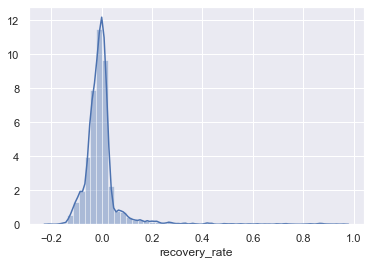

In [82]:
sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)
# We plot the distribution of the residuals.

In [83]:
pickle.dump(reg_lgd_st_2, open('lgd_model_stage_2.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'lgd_model_stage_1.sav'.

### Combining Stage 1 and Stage 2

In [84]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)

In [85]:
y_hat_test_lgd_stage_2_all

array([0.1193906 , 0.09605635, 0.13367631, ..., 0.12078611, 0.11587422,
       0.15667447])

In [86]:
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all
# Here we combine the predictions of the models from the two stages.

In [87]:
pd.DataFrame(y_hat_test_lgd).describe()
# Shows some descriptive statisics for the values of a column.

0
count  8648.000000
mean      0.073900
std       0.053015
min      -0.007634
25%       0.000000
50%       0.091085
75%       0.115948
max       0.236973

In [88]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)
# We set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.

In [89]:
pd.DataFrame(y_hat_test_lgd).describe()
# Shows some descriptive statisics for the values of a column.

0
count  8648.000000
mean      0.073902
std       0.053012
min       0.000000
25%       0.000000
50%       0.091085
75%       0.115948
max       0.236973

# EAD Model

### Estimation and Interpretation

In [90]:
# EAD model datasets
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['CCF'], test_size = 0.2, random_state = 42)
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

In [91]:
ead_inputs_train.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [92]:
ead_inputs_train = ead_inputs_train[features_all]
# Here we keep only the variables we need for the model.

In [93]:
ead_inputs_train = ead_inputs_train.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [94]:
reg_ead = LinearRegression()
# We create an instance of an object from the 'LogisticRegression' class.
reg_ead.fit(ead_inputs_train, ead_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
feature_name = ead_inputs_train.columns.values

In [96]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_lgd_st_2.p
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

Feature name  Coefficients      p_values
0                             Intercept  1.109746e+00           NaN
1                               grade:A -3.030033e-01  0.000000e+00
2                               grade:B -2.364277e-01  0.000000e+00
3                               grade:C -1.720232e-01  0.000000e+00
4                               grade:D -1.198470e-01  1.970424e-12
5                               grade:E -6.768713e-02  1.918578e-03
6                               grade:F -2.045907e-02  2.748685e-01
7               home_ownership:MORTGAGE -6.343341e-03  6.050271e-02
8                   home_ownership:NONE -5.539064e-03  9.092582e-05
9                  home_ownership:OTHER -2.426052e-03  6.436926e-01
10                   home_ownership:OWN -1.619582e-03  3.963089e-02
11     verification_status:Not Verified  5.339510e-05  5.528332e-01
12  verification_status:Source Verified  8.967822e-03  5.354622e-01
13                          purpose:car  7.904787e-04  6.340924e-01
14           purpose:debt_consolidation  1.264922e-02  9.646959e-01
15                  purpose:educational  9.643587e-02  5.368894e-09
16             purpose:home_improvement  1.923044e-02  2.729279e-01
17                        purpose:house  1.607120e-02  6.200015e-01
18               purpose:major_purchase  2.984917e-02  5.376877e-01
19                      purpose:medical  3.962479e-02  7.391253e-02
20                       purpose:moving  4.577630e-02  3.865040e-02
21                        purpose:other  3.706744e-02  1.089028e-01
22             purpose:renewable_energy  7.212969e-02  1.423251e-01
23               purpose:small_business  5.128674e-02  8.692143e-01
24                     purpose:vacation  1.874863e-02  7.311861e-01
25                      purpose:wedding  4.350522e-02  5.539872e-03
26                initial_list_status:w  1.318126e-02  4.662937e-15
27                             term_int  4.551882e-03  2.042660e-02
28                       emp_length_int -1.591478e-03  6.350976e-01
29                   mths_since_issue_d -4.305274e-03  0.000000e+00
30          mths_since_earliest_cr_line -3.634030e-05  1.087757e-04
31                          funded_amnt  2.212126e-06  6.992397e-01
32                             int_rate -1.172652e-02  1.887379e-14
33                          installment -6.865607e-05  5.568684e-01
34                           annual_inc  5.021817e-09  1.308549e-03
35                                  dti  2.832769e-04  6.897933e-02
36                          delinq_2yrs  4.833234e-04  5.043858e-02
37                       inq_last_6mths  1.131678e-02  1.819423e-02
38               mths_since_last_delinq -1.965980e-04  9.708935e-01
39               mths_since_last_record -5.085639e-05  1.809354e-01
40                             open_acc -2.142130e-03  1.365854e-09
41                              pub_rec  6.782062e-03  2.079574e-01
42                            total_acc  4.518110e-04  5.133116e-08
43                       acc_now_delinq  9.974801e-03  6.583494e-01
44                     total_rev_hi_lim  2.166527e-07  2.592628e-08

In [97]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_2.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

Feature name  Coefficients      p_values
0                             Intercept  1.109746e+00           NaN
1                               grade:A -3.030033e-01  0.000000e+00
2                               grade:B -2.364277e-01  0.000000e+00
3                               grade:C -1.720232e-01  0.000000e+00
4                               grade:D -1.198470e-01  1.970424e-12
5                               grade:E -6.768713e-02  1.918578e-03
6                               grade:F -2.045907e-02  2.748685e-01
7               home_ownership:MORTGAGE -6.343341e-03  6.050271e-02
8                   home_ownership:NONE -5.539064e-03  9.092582e-05
9                  home_ownership:OTHER -2.426052e-03  6.436926e-01
10                   home_ownership:OWN -1.619582e-03  3.963089e-02
11     verification_status:Not Verified  5.339510e-05  5.528332e-01
12  verification_status:Source Verified  8.967822e-03  5.354622e-01
13                          purpose:car  7.904787e-04  6.340924e-01
14           purpose:debt_consolidation  1.264922e-02  9.646959e-01
15                  purpose:educational  9.643587e-02  5.368894e-09
16             purpose:home_improvement  1.923044e-02  2.729279e-01
17                        purpose:house  1.607120e-02  6.200015e-01
18               purpose:major_purchase  2.984917e-02  5.376877e-01
19                      purpose:medical  3.962479e-02  7.391253e-02
20                       purpose:moving  4.577630e-02  3.865040e-02
21                        purpose:other  3.706744e-02  1.089028e-01
22             purpose:renewable_energy  7.212969e-02  1.423251e-01
23               purpose:small_business  5.128674e-02  8.692143e-01
24                     purpose:vacation  1.874863e-02  7.311861e-01
25                      purpose:wedding  4.350522e-02  5.539872e-03
26                initial_list_status:w  1.318126e-02  4.662937e-15
27                             term_int  4.551882e-03  2.042660e-02
28                       emp_length_int -1.591478e-03  6.350976e-01
29                   mths_since_issue_d -4.305274e-03  0.000000e+00
30          mths_since_earliest_cr_line -3.634030e-05  1.087757e-04
31                          funded_amnt  2.212126e-06  6.992397e-01
32                             int_rate -1.172652e-02  1.887379e-14
33                          installment -6.865607e-05  5.568684e-01
34                           annual_inc  5.021817e-09  1.308549e-03
35                                  dti  2.832769e-04  6.897933e-02
36                          delinq_2yrs  4.833234e-04  5.043858e-02
37                       inq_last_6mths  1.131678e-02  1.819423e-02
38               mths_since_last_delinq -1.965980e-04  9.708935e-01
39               mths_since_last_record -5.085639e-05  1.809354e-01
40                             open_acc -2.142130e-03  1.365854e-09
41                              pub_rec  6.782062e-03  2.079574e-01
42                            total_acc  4.518110e-04  5.133116e-08
43                       acc_now_delinq  9.974801e-03  6.583494e-01
44                     total_rev_hi_lim  2.166527e-07  2.592628e-08

### Model Validation

In [98]:
ead_inputs_test = ead_inputs_test[features_all]
# Here we keep only the variables we need for the model.

In [99]:
ead_inputs_test = ead_inputs_test.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [100]:
ead_inputs_test.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [101]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [102]:
ead_targets_test_temp = ead_targets_test

In [103]:
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop = True)
# We reset the index of a dataframe.

In [104]:
pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)], axis = 1).corr()
# We calculate the correlation between actual and predicted values.

CCF         0
CCF  1.000000  0.530654
0    0.530654  1.000000

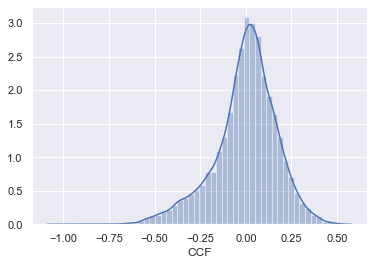

In [105]:
sns.distplot(ead_targets_test - y_hat_test_ead)
# We plot the distribution of the residuals.

In [106]:
pd.DataFrame(y_hat_test_ead).describe()
# Shows some descriptive statisics for the values of a column.

0
count  8648.000000
mean      0.736013
std       0.105194
min       0.384774
25%       0.661553
50%       0.731750
75%       0.810625
max       1.161088

In [107]:
y_hat_test_ead = np.where(y_hat_test_ead < 0, 0, y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead > 1, 1, y_hat_test_ead)
# We set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.

In [108]:
pd.DataFrame(y_hat_test_ead).describe()
# Shows some descriptive statisics for the values of a column.

0
count  8648.000000
mean      0.735992
std       0.105127
min       0.384774
25%       0.661553
50%       0.731750
75%       0.810625
max       1.000000

# Expected Loss

In [109]:
loan_data_preprocessed.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... addr_state:UT addr_state:VA  \
0   36 months     10.65       162.87     B  ...             0             0   
1   60 months     15.27        59.83     C  ...             0             0   
2   36 months     15.96        84.33     C  ...             0             0   
3   36 months     13.49       339.31     C  ...             0             0   
4   60 months     12.69        67.79     B  ...             0             0   

  addr_state:VT addr_state:WA  addr_state:WI addr_state:WV addr_state:WY  \
0             0             0              0             0             0   
1             0             0              0             0             0   
2             0             0              0             0             0   
3             0             0              0             0             0   
4             0             0              0             0             0   

  initial_list_status:f initial_list_status:w good_bad  
0                     1                     0        1  
1                     1                     0        0  
2                     1                     0        1  
3                     1                     0        1  
4                     1                     0        1  

[5 rows x 208 columns]

In [110]:
loan_data_preprocessed['mths_since_last_delinq'].fillna(0, inplace = True)
# We fill the missing values with zeroes.

In [111]:
loan_data_preprocessed['mths_since_last_record'].fillna(0, inplace = True)
# We fill the missing values with zeroes.

In [112]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed[features_all]
# Here we keep only the variables we need for the model.

In [113]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed_lgd_ead.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [114]:
loan_data_preprocessed['recovery_rate_st_1'] = reg_lgd_st_1.model.predict(loan_data_preprocessed_lgd_ead)
# We apply the stage 1 LGD model and calculate predicted values.

In [115]:
loan_data_preprocessed['recovery_rate_st_2'] = reg_lgd_st_2.predict(loan_data_preprocessed_lgd_ead)
# We apply the stage 2 LGD model and calculate predicted values.

In [116]:
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_st_1'] * loan_data_preprocessed['recovery_rate_st_2']
# We combine the predicted values from the stage 1 predicted model and the stage 2 predicted model
# to calculate the final estimated recovery rate.

In [117]:
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] < 0, 0, loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] > 1, 1, loan_data_preprocessed['recovery_rate'])
# We set estimated recovery rates that are greater than 1 to 1 and  estimated recovery rates that are less than 0 to 0.

In [118]:
loan_data_preprocessed['LGD'] = 1 - loan_data_preprocessed['recovery_rate']
# We calculate estimated LGD. Estimated LGD equals 1 - estimated recovery rate.

In [119]:
loan_data_preprocessed['LGD'].describe()
# Shows some descriptive statisics for the values of a column.

count    466285.000000
mean          0.940356
std           0.058113
min           0.357914
25%           0.886136
50%           0.931573
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

In [120]:
loan_data_preprocessed['CCF'] = reg_ead.predict(loan_data_preprocessed_lgd_ead)
# We apply the EAD model to calculate estimated credit conversion factor.

In [121]:
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] < 0, 0, loan_data_preprocessed['CCF'])
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] > 1, 1, loan_data_preprocessed['CCF'])
# We set estimated CCF that are greater than 1 to 1 and  estimated CCF that are less than 0 to 0.

In [122]:
loan_data_preprocessed['EAD'] = loan_data_preprocessed['CCF'] * loan_data_preprocessed_lgd_ead['funded_amnt']
# We calculate estimated EAD. Estimated EAD equals estimated CCF multiplied by funded amount.

In [123]:
loan_data_preprocessed['EAD'].describe()
# Shows some descriptive statisics for the values of a column.

count    466285.000000
mean      10814.846760
std        6935.184562
min         190.347372
25%        5495.101413
50%        9208.479591
75%       14692.844549
max       35000.000000
Name: EAD, dtype: float64

In [124]:
loan_data_preprocessed.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... addr_state:WY  \
0   36 months     10.65       162.87     B  ...             0   
1   60 months     15.27        59.83     C  ...             0   
2   36 months     15.96        84.33     C  ...             0   
3   36 months     13.49       339.31     C  ...             0   
4   60 months     12.69        67.79     B  ...             0   

  initial_list_status:f initial_list_status:w good_bad  recovery_rate_st_1  \
0                     1                     0        1                   1   
1                     1                     0        0                   1   
2                     1                     0        1                   1   
3                     1                     0        1                   1   
4                     1                     0        1                   0   

  recovery_rate_st_2 recovery_rate       LGD       CCF          EAD  
0           0.086271      0.086271  0.913729  0.589922  2949.608449  
1           0.084518      0.084518  0.915482  0.777773  1944.433378  
2           0.080516      0.080516  0.919484  0.658306  1579.934302  
3           0.095076      0.095076  0.904924  0.660656  6606.559612  
4           0.088547      0.000000  1.000000  0.708211  2124.631667  

[5 rows x 214 columns]

In [125]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv')
# We import data to apply the PD model.

In [126]:
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv')
# We import data to apply the PD model.

In [127]:
loan_data_inputs_pd = pd.concat([loan_data_inputs_train, loan_data_inputs_test], axis = 0)
# We concatenate the two dataframes along the rows.

In [128]:
loan_data_inputs_pd.shape

(466285, 324)

In [129]:
loan_data_inputs_pd.head()

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      427211  12796369   14818505      24000        24000          24000.0   
1      206088   1439740    1691948      10000        10000          10000.0   
2      136020   5214749    6556909      20425        20425          20425.0   
3      412305  13827698   15890016      17200        17200          17200.0   
4       36159    422455     496525       8400         8400           7450.0   

         term  int_rate  installment grade  ... dti:21.7-22.4 dti:22.4-35  \
0   36 months      8.90       762.08     A  ...             1           0   
1   36 months     14.33       343.39     C  ...             0           0   
2   36 months      8.90       648.56     A  ...             0           0   
3   36 months     16.59       609.73     D  ...             0           0   
4   36 months     12.84       282.40     C  ...             0           1   

  dti:>35 mths_since_last_record:Missing  mths_since_last_record:0-2  \
0       0                              1                           0   
1       0                              1                           0   
2       0                              1                           0   
3       0                              1                           0   
4       0                              1                           0   

  mths_since_last_record:3-20 mths_since_last_record:21-31  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

  mths_since_last_record:32-80 mths_since_last_record:81-86  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

  mths_since_last_record:>86  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 324 columns]

In [130]:
loan_data_inputs_pd = loan_data_inputs_pd.set_index('Unnamed: 0')
# We set the index of the dataframe to the values of a specific column. 

In [131]:
loan_data_inputs_pd.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
Unnamed: 0                                                                 
427211      12796369   14818505      24000        24000          24000.0   
206088       1439740    1691948      10000        10000          10000.0   
136020       5214749    6556909      20425        20425          20425.0   
412305      13827698   15890016      17200        17200          17200.0   
36159         422455     496525       8400         8400           7450.0   

                  term  int_rate  installment grade sub_grade  ...  \
Unnamed: 0                                                     ...   
427211       36 months      8.90       762.08     A        A5  ...   
206088       36 months     14.33       343.39     C        C1  ...   
136020       36 months      8.90       648.56     A        A5  ...   
412305       36 months     16.59       609.73     D        D1  ...   
36159        36 months     12.84       282.40     C        C2  ...   

           dti:21.7-22.4 dti:22.4-35 dti:>35  mths_since_last_record:Missing  \
Unnamed: 0                                                                     
427211                 1           0       0                               1   
206088                 0           0       0                               1   
136020                 0           0       0                               1   
412305                 0           0       0                               1   
36159                  0           1       0                               1   

           mths_since_last_record:0-2 mths_since_last_record:3-20  \
Unnamed: 0                                                          
427211                              0                           0   
206088                              0                           0   
136020                              0                           0   
412305                              0                           0   
36159                               0                           0   

           mths_since_last_record:21-31 mths_since_last_record:32-80  \
Unnamed: 0                                                             
427211                                0                            0   
206088                                0                            0   
136020                                0                            0   
412305                                0                            0   
36159                                 0                            0   

           mths_since_last_record:81-86 mths_since_last_record:>86  
Unnamed: 0                                                          
427211                                0                          0  
206088                                0                          0  
136020                                0                          0  
412305                                0                          0  
36159                                 0                          0  

[5 rows x 323 columns]

In [132]:
features_all_pd = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']

In [133]:
ref_categories_pd = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [134]:
loan_data_inputs_pd_temp = loan_data_inputs_pd[features_all_pd]
# Here we keep only the variables we need for the model.

In [135]:
loan_data_inputs_pd_temp = loan_data_inputs_pd_temp.drop(ref_categories_pd, axis = 1)
# Here we remove the dummy variable reference categories.

In [136]:
loan_data_inputs_pd_temp.shape

(466285, 84)

In [137]:
import pickle

In [138]:
reg_pd = pickle.load(open('pd_model.sav', 'rb'))
# We import the PD model, stored in the 'pd_model.sav' file.

In [139]:
reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]
# We apply the PD model to caclulate estimated default probabilities.

array([0.02957242, 0.0920437 , 0.0373373 , ..., 0.02678187, 0.0402515 ,
       0.04763175])

In [140]:
loan_data_inputs_pd['PD'] = reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]
# We apply the PD model to caclulate estimated default probabilities.

In [141]:
loan_data_inputs_pd['PD'].head()

Unnamed: 0
427211    0.029572
206088    0.092044
136020    0.037337
412305    0.204286
36159     0.200192
Name: PD, dtype: float64

In [142]:
loan_data_inputs_pd['PD'].describe()
# Shows some descriptive statisics for the values of a column.

count    466285.000000
mean          0.109312
std           0.070924
min           0.007302
25%           0.056077
50%           0.093509
75%           0.146566
max           0.638271
Name: PD, dtype: float64

In [143]:
loan_data_preprocessed_new = pd.concat([loan_data_preprocessed, loan_data_inputs_pd], axis = 1)
# We concatenate the dataframes where we calculated LGD and EAD and the dataframe where we calculated PD along the columns.

In [144]:
del loan_data_preprocessed, loan_data_inputs_pd

In [145]:
loan_data_preprocessed_new.shape

(466285, 538)

In [146]:
loan_data_preprocessed_new.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... dti:22.4-35 dti:>35  \
0   36 months     10.65       162.87     B  ...           1       0   
1   60 months     15.27        59.83     C  ...           0       0   
2   36 months     15.96        84.33     C  ...           0       0   
3   36 months     13.49       339.31     C  ...           0       0   
4   60 months     12.69        67.79     B  ...           0       0   

  mths_since_last_record:Missing mths_since_last_record:0-2  \
0                              1                          0   
1                              1                          0   
2                              1                          0   
3                              1                          0   
4                              1                          0   

   mths_since_last_record:3-20 mths_since_last_record:21-31  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

  mths_since_last_record:32-80 mths_since_last_record:81-86  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

  mths_since_last_record:>86        PD  
0                          0  0.164790  
1                          0  0.282810  
2                          0  0.230736  
3                          0  0.208742  
4                          0  0.129281  

[5 rows x 538 columns]

In [150]:
loan_data_preprocessed_new['EL'] = loan_data_preprocessed_new.PD * loan_data_preprocessed_new.LGD * loan_data_preprocessed_new.EAD
# We calculate Expected Loss. EL = PD * LGD * EAD.

In [151]:
loan_data_preprocessed_new['EL'].describe()
# Shows some descriptive statisics for the values of a column.

count    466285.000000
mean       1095.641638
std        1099.143684
min           9.533692
25%         362.998385
50%         720.869585
75%        1432.079145
max       11921.766402
Name: EL, dtype: float64

In [152]:
loan_data_preprocessed_new[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL']].head()

funded_amnt  funded_amnt        PD       LGD          EAD           EL
0         5000         5000  0.164790  0.913729  2949.608449   444.132806
1         2500         2500  0.282810  0.915482  1944.433378   503.427547
2         2400         2400  0.230736  0.919484  1579.934302   335.195753
3        10000        10000  0.208742  0.904924  6606.559612  1247.952005
4         3000         3000  0.129281  1.000000  2124.631667   274.673867

In [153]:
loan_data_preprocessed_new['funded_amnt'].describe()

funded_amnt    funded_amnt
count  466285.000000  466285.000000
mean    14291.801044   14291.801044
std      8274.371300    8274.371300
min       500.000000     500.000000
25%      8000.000000    8000.000000
50%     12000.000000   12000.000000
75%     20000.000000   20000.000000
max     35000.000000   35000.000000

In [154]:
loan_data_preprocessed_new['EL'].sum()
# Total Expected Loss for all loans.

510881260.94271564

In [157]:
loan_data_preprocessed_new['funded_amnt'].sum()
# Total funded amount for all loans.

funded_amnt    6664052450
funded_amnt    6664052450
dtype: int64

In [158]:
loan_data_preprocessed_new['EL'].sum() / loan_data_preprocessed_new['funded_amnt'].sum()
# Total Expected Loss as a proportion of total funded amount for all loans.
####
####
####
# THE END.

funded_amnt    0.076662
funded_amnt    0.076662
dtype: float64